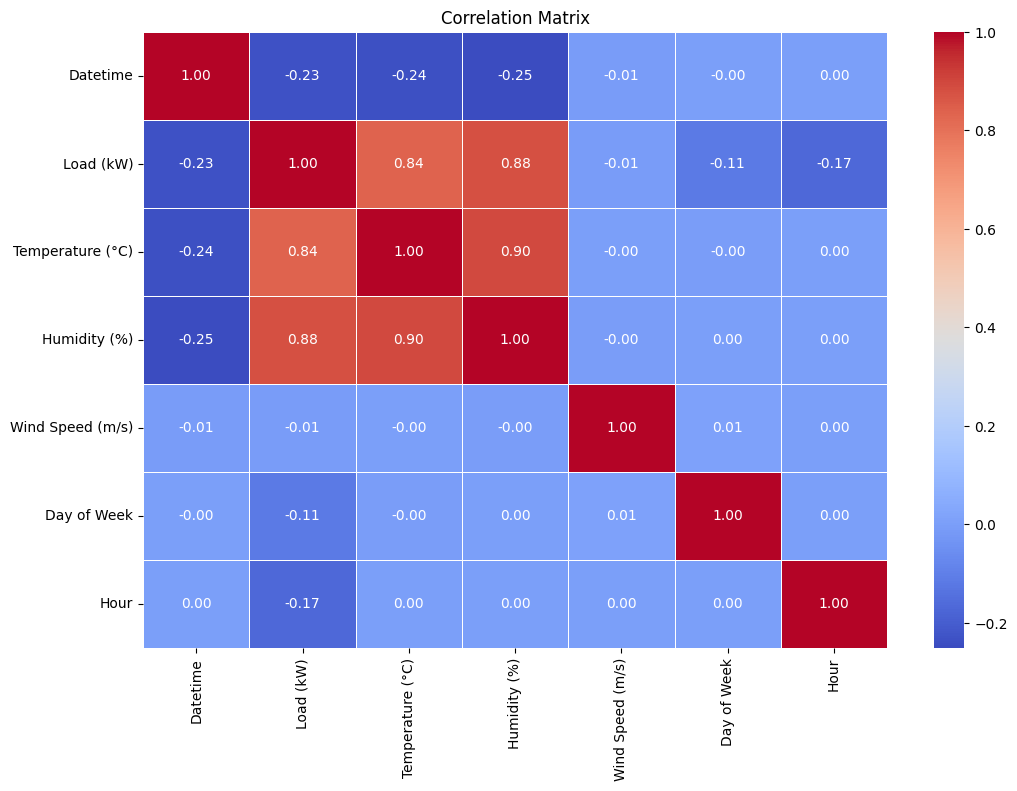

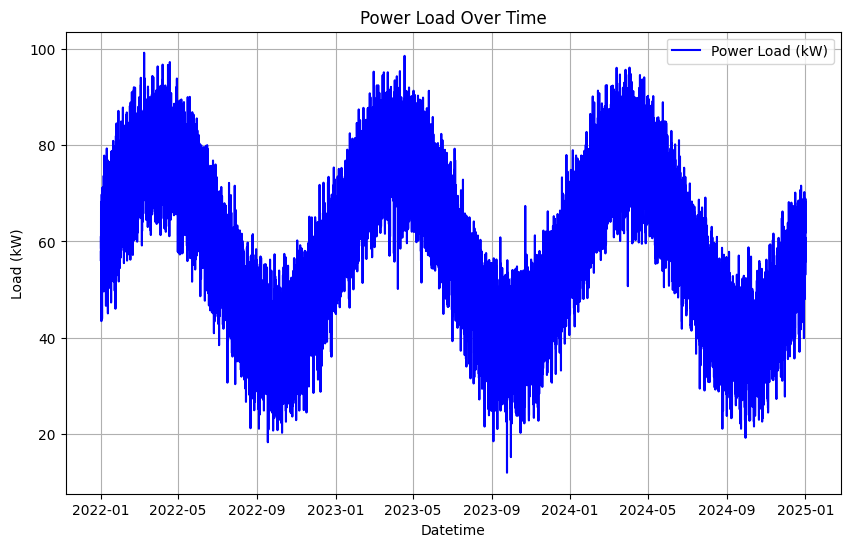

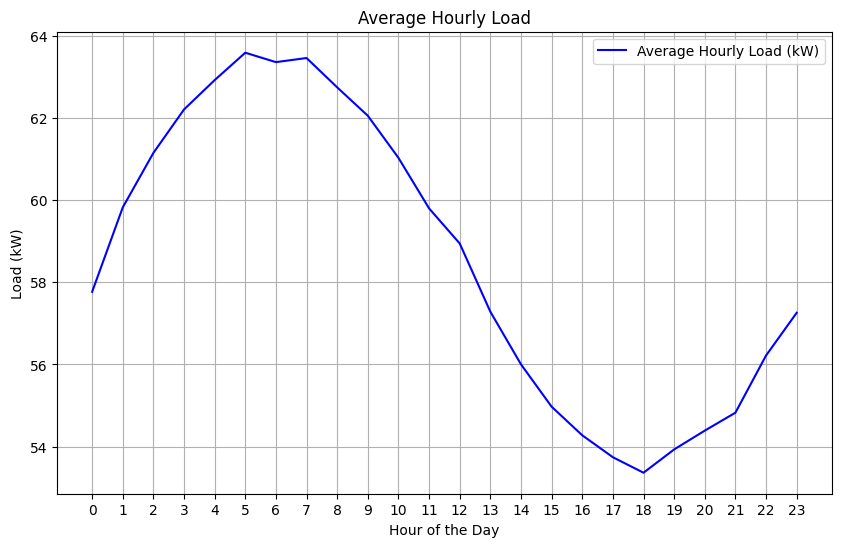

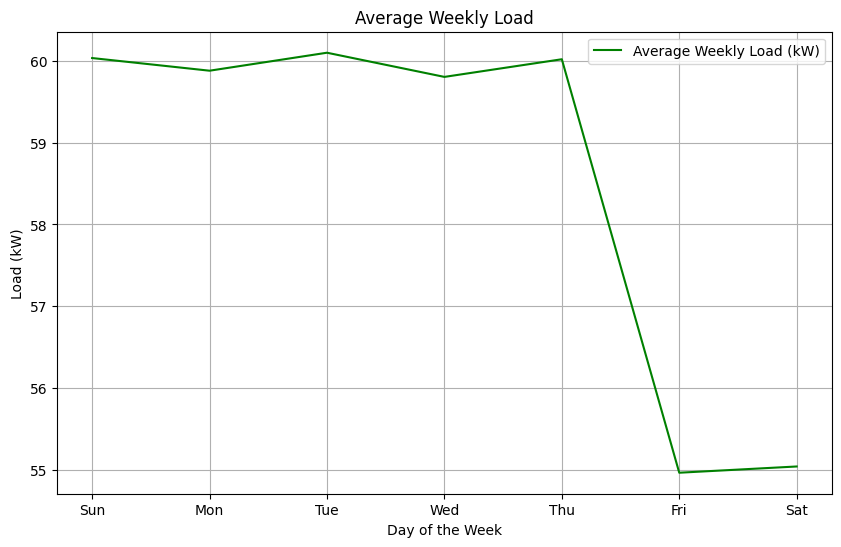

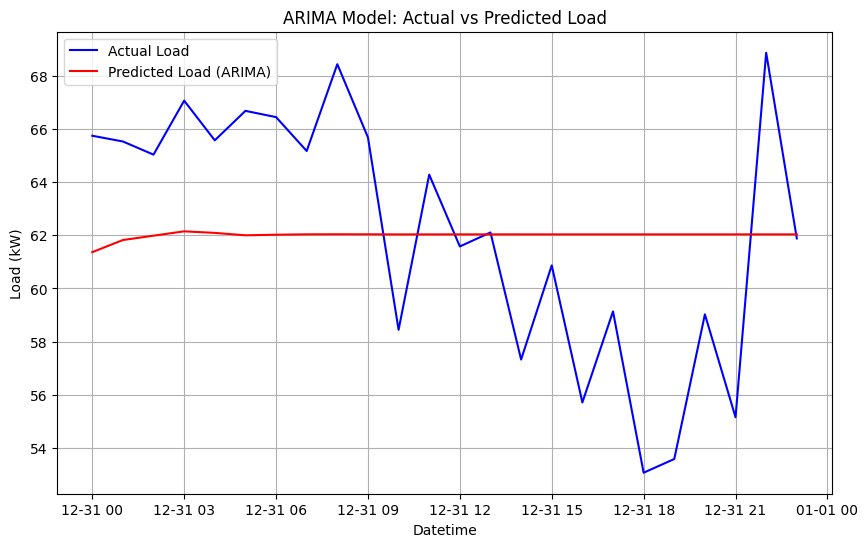

ARIMA Model MSE: 22.0760
ARIMA Model MAE: 4.0685
Epoch 1/20


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


658/658 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 896.5113 - mae: 20.9070 - val_loss: 48.7631 - val_mae: 5.5718
Epoch 2/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 89.3628 - mae: 7.5478 - val_loss: 47.2585 - val_mae: 5.4770
Epoch 3/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 87.2690 - mae: 7.4117 - val_loss: 50.3460 - val_mae: 5.6621
Epoch 4/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 82.5222 - mae: 7.2355 - val_loss: 48.7752 - val_mae: 5.5744
Epoch 5/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 78.9585 - mae: 7.1145 - val_loss: 48.0542 - val_mae: 5.5328
Epoch 6/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 76.2846 - mae: 6.9267 - val_loss: 46.4049 - val_mae: 5.4316
Epoch 7/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 69.2741 - mae: 6.6175 - val_loss: 59.8799 - val_mae: 6.1722
Epoch 8/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 61.4986 - mae: 6.2230 - val_loss: 69.6422 - val_mae: 6.6949
Epoch 9/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

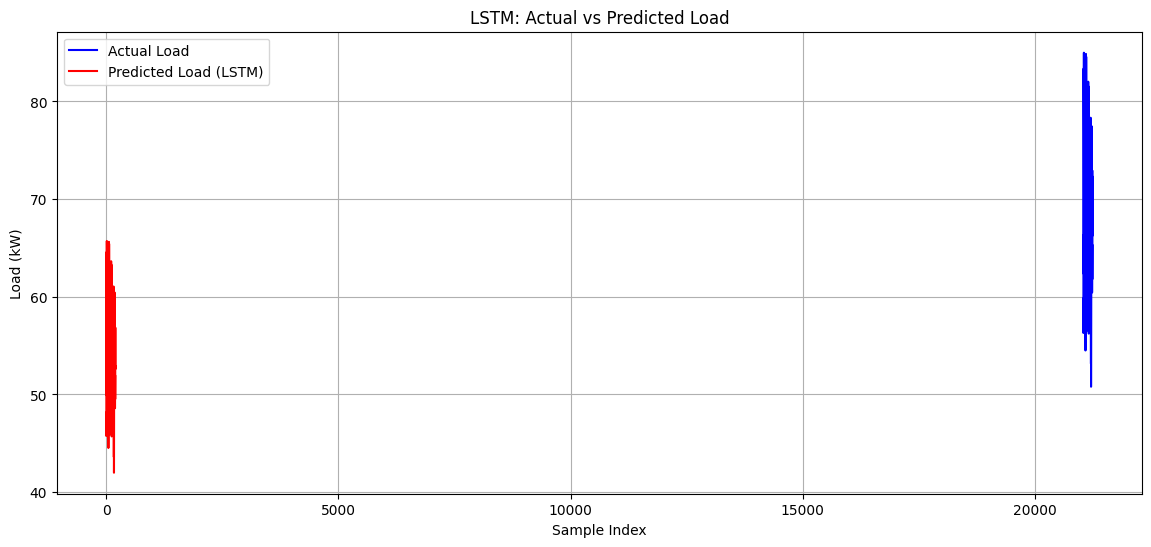

Epoch 1/20


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


658/658 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1012.2117 - mae: 21.9853 - val_loss: 52.5390 - val_mae: 5.7976
Epoch 2/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 85.3667 - mae: 7.3576 - val_loss: 48.7452 - val_mae: 5.5616
Epoch 3/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 81.3314 - mae: 7.1622 - val_loss: 51.7851 - val_mae: 5.7283
Epoch 4/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 72.1643 - mae: 6.7728 - val_loss: 53.0024 - val_mae: 5.7960
Epoch 5/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 63.7161 - mae: 6.3367 - val_loss: 68.3813 - val_mae: 6.6274
Epoch 6/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 60.0654 - mae: 6.1502 - val_loss: 72.3652 - val_mae: 6.8391
Epoch 7/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 57.6411 - mae: 6.0225 - val_loss: 105.6307 - val_mae: 8.5274
Epoch 8/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 57.5594 - mae: 6.0000 - val_loss: 100.3677 - val_mae: 8.2790
Epoch 9/20
658/658 ━━━━━━━━━━━━━━━━━━━━ 8s 6m

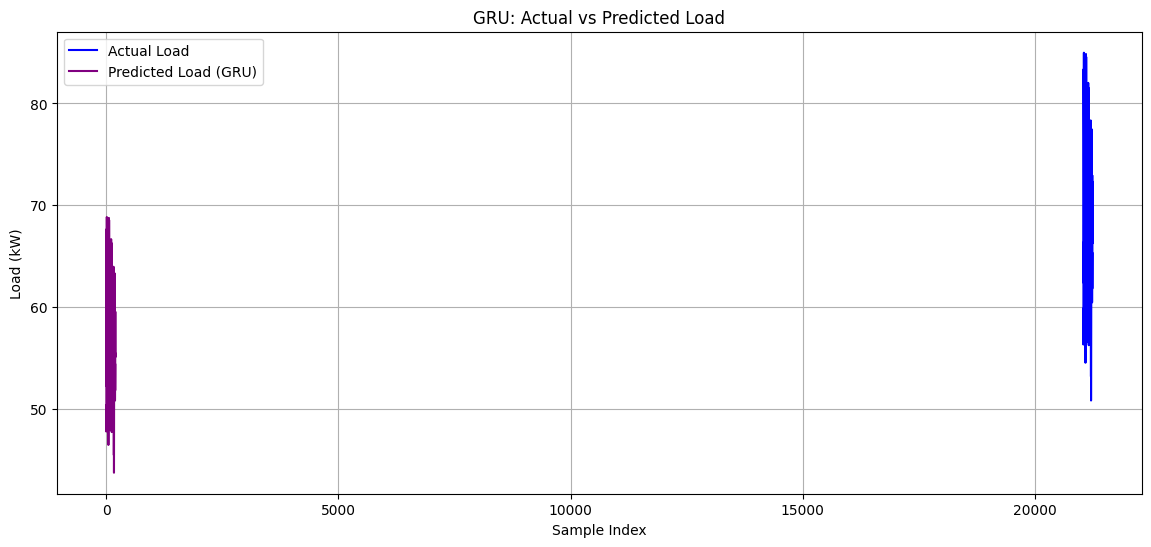

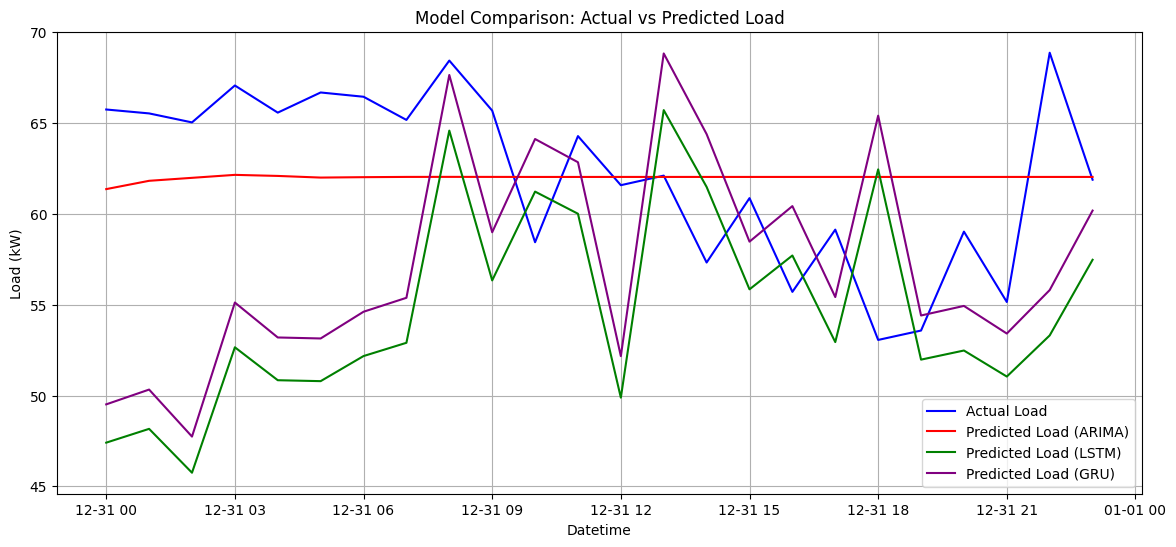

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

# Load your data
# data = pd.read_csv('your_dataset.csv')  # Example to load data

# 1. Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Power Load Over Time
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['Load (kW)'], label='Power Load (kW)', color='blue')
plt.title('Power Load Over Time')
plt.xlabel('Datetime')
plt.ylabel('Load (kW)')
plt.grid(True)
plt.legend()
plt.show()

# 3. Hourly Load Pattern (Average)
hourly_load = data.groupby('Hour')['Load (kW)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_load, label='Average Hourly Load (kW)', color='blue')
plt.title('Average Hourly Load')
plt.xlabel('Hour of the Day')
plt.ylabel('Load (kW)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

# 4. Weekly Load Pattern (Average)
weekly_load = data.groupby('Day of Week')['Load (kW)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(weekly_load, label='Average Weekly Load (kW)', color='green')
plt.title('Average Weekly Load')
plt.xlabel('Day of the Week')
plt.ylabel('Load (kW)')
plt.xticks(range(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True)
plt.legend()
plt.show()

# 5. ARIMA Model
model = ARIMA(data['Load (kW)'], order=(5, 1, 0))  # Example parameters (p, d, q)
model_fit = model.fit()
predictions = model_fit.forecast(steps=24)  # Predict the next 24 hours

# ARIMA Model Evaluation
mse = mean_squared_error(data['Load (kW)'][-24:], predictions)
mae = mean_absolute_error(data['Load (kW)'][-24:], predictions)

# Plot ARIMA predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'][-24:], data['Load (kW)'][-24:], label='Actual Load', color='blue')
plt.plot(data['Datetime'][-24:], predictions, label='Predicted Load (ARIMA)', color='red')
plt.title('ARIMA Model: Actual vs Predicted Load')
plt.xlabel('Datetime')
plt.ylabel('Load (kW)')
plt.legend()
plt.grid(True)
plt.show()

print(f"ARIMA Model MSE: {mse:.4f}")
print(f"ARIMA Model MAE: {mae:.4f}")

# 6. LSTM Model
# Preprocess data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate LSTM model
lstm_loss, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Model Test Loss: {lstm_loss:.4f}, MAE: {lstm_mae:.4f}")

# LSTM Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Plot LSTM predictions vs actual
plt.figure(figsize=(14, 6))
plt.plot(y_test[:200], label='Actual Load', color='blue')
plt.plot(y_pred_lstm[:200], label='Predicted Load (LSTM)', color='red')
plt.title('LSTM: Actual vs Predicted Load')
plt.xlabel('Sample Index')
plt.ylabel('Load (kW)')
plt.legend()
plt.grid(True)
plt.show()

# 7. GRU Model
X_train_gru = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Build the GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile and train GRU model
gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_history = gru_model.fit(X_train_gru, y_train, epochs=20, batch_size=32, validation_data=(X_test_gru, y_test))

# Evaluate GRU model
gru_loss, gru_mae = gru_model.evaluate(X_test_gru, y_test)
print(f"GRU Model Test Loss: {gru_loss:.4f}, MAE: {gru_mae:.4f}")

# GRU Predictions
gru_y_pred = gru_model.predict(X_test_gru)

# Plot GRU predictions vs actual
plt.figure(figsize=(14, 6))
plt.plot(y_test[:200], label='Actual Load', color='blue')
plt.plot(gru_y_pred[:200], label='Predicted Load (GRU)', color='purple')
plt.title('GRU: Actual vs Predicted Load')
plt.xlabel('Sample Index')
plt.ylabel('Load (kW)')
plt.legend()
plt.grid(True)
plt.show()

# 8. Comparison of Models (ARIMA, LSTM, GRU)
plt.figure(figsize=(14, 6))
plt.plot(data['Datetime'][-24:], data['Load (kW)'][-24:], label='Actual Load', color='blue')
plt.plot(data['Datetime'][-24:], predictions, label='Predicted Load (ARIMA)', color='red')
plt.plot(data['Datetime'][-24:], y_pred_lstm[:24], label='Predicted Load (LSTM)', color='green')
plt.plot(data['Datetime'][-24:], gru_y_pred[:24], label='Predicted Load (GRU)', color='purple')
plt.title('Model Comparison: Actual vs Predicted Load')
plt.xlabel('Datetime')
plt.ylabel('Load (kW)')
plt.legend()
plt.grid(True)
plt.show()
